In [1]:
# Import the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split,cross_val_score,RepeatedKFold
from sklearn.metrics import mean_absolute_error,root_mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('ice_cream_sales.csv') # load the dataset
df # Examine the dataset
# The dataset is very simple and we will have this equation for the line :

'''
                             y = mx + c 
    y = column to be predicted (Ice Cream Profits) using the equation.
    m = slope/coeffecient/weight/tangent(theta/s) which shows how important a variable is in contributing in prediction of y. 
    (The greater the value the more important that variable(column) attached to it is).
    c = intercept value which is responsible the moving of line in x and y axis (hyperplane in higher dimensions).
'''

'''
Here we have :
                y = Ice Cream Profits
                x = Temperature
                m , c = to be calculated so we can make a relationship between them 
'''

'''
Why find the relationship ?

        Suppose in future we have a temperature and wants to predict the Ice Cream Profits , then we can use our model to predict this 
which will be based on this relation we are gonna calculate .
'''


'\nWhy find the relationship ?\n\n        Suppose in future we have a temperature and wants to predict the Ice Cream Profits , then we can use our model to predict this \nwhich will be based on this relation we are gonna calculate .\n'

In [3]:
df.info()
# As expected we have non null values as this dataset is small and already cleaned
# If not cleaned we would have had to do some outlier analysis , imputation methods and other techniques on the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Temperature        365 non-null    int64  
 1   Ice Cream Profits  365 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 5.8 KB


In [4]:
df.describe() # Gives the 5 number summary

,Temperature,Ice Cream Profits
count,365.000000,365.000000
mean,71.980822,52.103616
std,13.258510,15.989004
min,39.000000,11.880000
25%,63.000000,40.650000
50%,73.000000,53.620000
75%,82.000000,63.630000
max,101.000000,89.290000


In [5]:
# Splitting data into X (the variables that will affect the value to be predicted) and y(the values to be predicted)
X = df[['Temperature']]
y = df['Ice Cream Profits']

In [6]:
# You can try plotting the distrbutions and the kde plot for these variables (found to be almost normally distributed).
# In a multivaribale dataste we will be plotting data a lot before actually deep diving because certain plots
# express a lot about the variable : outlier , distribution , trends , min and max value ,etc

<Axes: xlabel='Temperature', ylabel='Ice Cream Profits'>

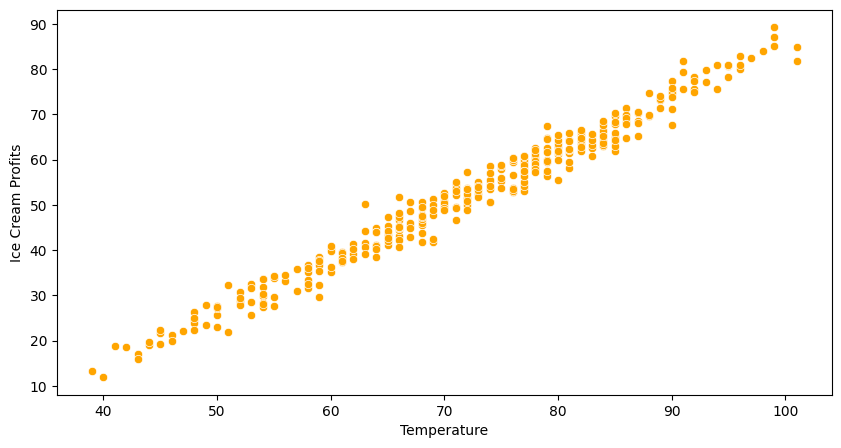

In [7]:
# Plotting the scatterplot to see what type of relation is between temperature and ice cream profits.
plt.figure(figsize=(10,5))
sns.scatterplot(
    data = df,
    x = 'Temperature', # The x features / variables
    y = 'Ice Cream Profits', # The y outputs / values to be predicted
    color = 'orange'
)
# The graph has a linear relationship so we can apply linear regression to predict ice cream profits.

In [8]:
# Now we will divide the data into training and testing sets as one training set will be used 
# for training the model where the model understand and fits it , and during the prediction phase 
# the testing set will bs used to evaluate the model's performance.

X_train , X_test , y_train ,y_test = train_test_split(
    X, # The X variables
    y, # The y column
    test_size = 0.3, # The test-train ratio ; train-test percentage split : 70-30 automatically as 0.3 is passed for test_size.
    random_state = 42 # This value is set when the split is to be reproduced 
) 

In [9]:
# Now use this subsets accordingly as the data to be passed to model below whenever needed.

In [10]:
# Now we will use the Sci-kit learn library to import different linear models and evaluate which model performs the best .

In [11]:
# Firstly using the LinearRegression model
lr = LinearRegression() # instantiate the model

In [12]:
lr.fit(X_train,y_train) # Fit with the training subset so that the model is trained and ready to be tested on some unknown values.

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [13]:
# We can examine the parameters below :
print(f'The slope m is : {lr.coef_[0]}')
print(f'The intercept c is : {lr.intercept_}')

The slope m is : 1.1873166719324824
The intercept c is : -33.499203058856644


In [14]:
# Now lets make the prediction and store it in a variable 
y_pred_lr = lr.predict(X_test) # Prediction is always done on unknown x test and then is evaluated with 
# ytest to check for accuracy,precision,r2core,etc. 

In [15]:
# Actually u might have wondered that there are many possibilities (permutations) for the selection of 
# train and test from the whole dataset .
# If for example if we break the data into 10 blocks then which block will be used for train and which 
# for test ? So cross val score does the whole process given the folds passed and the average score of the parameter
# for example 'precision' is calculated  and then we can get a better score rather than just a simple metric score on its own.

# Even the fold passed can have all the outlier in a single fold so to even average that we will be using RepeatedKfold 
# whose job is to repeat the times passed

rkf = RepeatedKFold(
                    n_splits=10, # the number of splits to be done
                    n_repeats=5, # How many times to repeat the step for each split
                    random_state=42
)

cvs_lr = cross_val_score(
    lr, # The model always passed as the first parameter
    X, # The X set
    y, # The y set
    cv = rkf # The spliting size
) # Mean of all the splits

print(f'The mean of the cvs lr : {cvs_lr.mean()}')
print(f'The std of the cvs lr : {cvs_lr.std()}')

The mean of the cvs lr : 0.9753725430668192
The std of the cvs lr : 0.0072829447784530784


In [ ]:
# Lets analyze some metrics for this :
print(f'The r2score for the lr model : {r2_score(y_pred_lr,y_test)}')
print(f'The rmse for the lr model : {root_mean_squared_error(y_pred_lr,y_test)}')
print(f'The mae for the lr model : {mean_absolute_error(y_pred_lr,y_test)}')

The r2score for the lr model : 0.982109982691965
The rmse for the lr model : 2.313747714474943
The mae for the lr model : 1.8761735107267787


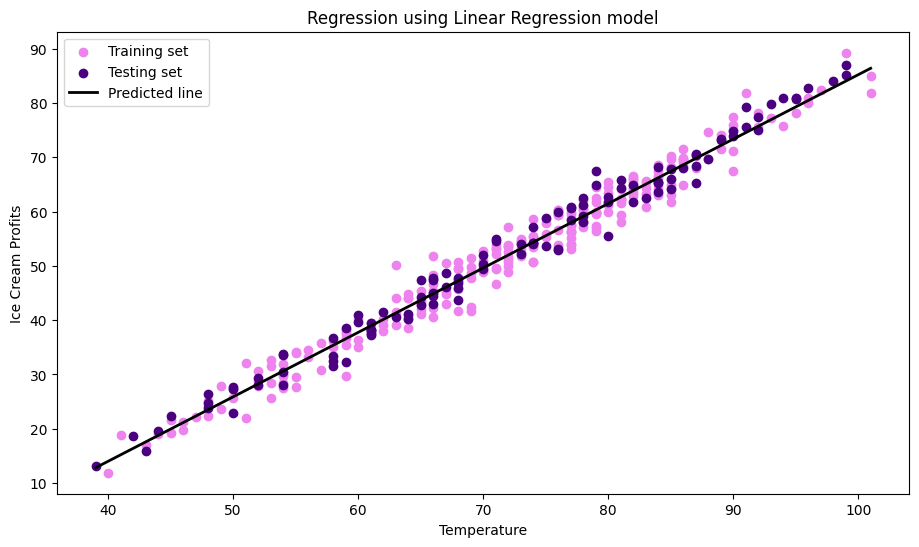

In [17]:
plt.figure(figsize=(11,6))
plt.scatter(
    X_train, 
    y_train,
    color = 'violet',
    label = 'Training set'
)
plt.scatter(
    X_test, 
    y_test,
    color = 'indigo',
    label = 'Testing set'
)
plt.plot(X,
        lr.predict(X), # Predicting the whole X column as we want a whole line
        color = 'black',
        linewidth = 2,
        label = 'Predicted line'
        )
plt.xlabel('Temperature')
plt.ylabel('Ice Cream Profits')
plt.title('Regression using Linear Regression model')
plt.legend()
plt.show()

In [18]:
# The model is already performing amazing but I think this is because of the data size and the simplicity of the data

In [19]:
# Now we will try applying polynomial regression on this same dataset using PolynomialFeatures

In [ ]:
# To ensure the process is clean we use pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [ ]:
pipe1 = Pipeline([
    ('poly1' , PolynomialFeatures(degree = 2)), # Provide the degree of the polynomial to be made
    ('lr_1' , LinearRegression() ) # Another linear regression model
])

In [ ]:
pipe1.fit(X_train,y_train) # Fit the training set in the pipeline

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('poly1', ...), ('lr_1', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"degree degree: int or tuple (min_degree, max_degree), default=2If a single int is given, it specifies the maximal degree of thepolynomial features. If a tuple `(min_degree, max_degree)` is passed,then `min_degree` is the minimum and `max_degree` is the maximumpolynomial degree of the generated features. Note that `min_degree=0`and `min_degree=1` are equivalent as outputting the degree zero term isdetermined by `include_bias`.",3
,"interaction_only interaction_only: bool, default=FalseIf `True`, only interaction features are produced: features that areproducts of at most `degree` *distinct* input features, i.e. terms withpower of 2 or higher of the same input feature are excluded:- included: `x[0]`, `x[1]`, `x[0] * x[1]`, etc.- excluded: `x[0] ** 2`, `x[0] ** 2 * x[1]`, etc.",False
,"include_bias include_bias: bool, default=TrueIf `True` (default), then include a bias column, the feature in whichall polynomial powers are zero (i.e. a column of ones - acts as anintercept term in a linear model).",True
,"order order: {'C', 'F'}, default='C'Order of output array in the dense case. `'F'` order is faster tocompute, but may slow down subsequent estimators... versionadded:: 0.21",'C'
,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06


In [ ]:
y_pred_poly = pipe1.predict(X_test) # Predict using the predict method which is og the lr_1 model

In [ ]:
lr_1 = pipe1.named_steps['lr_1'] # Extract the lr_1 model using the names steps method

In [ ]:
# Exactly as we did before but with our new model
rkf2 = RepeatedKFold(
    n_splits = 10,
    n_repeats = 5,
    random_state = 23
)

cvs_poly = cross_val_score(
    lr_1,
    X,
    y,
    cv = rkf2
)

In [ ]:
# Same as earlier but with new model and predictions :
print(f'The mean of the cvs_poly : {cvs_poly.mean()}')
print(f'The std of the cvs_poly : {cvs_poly.std()}')
print(f'The r2score for the poly model : {r2_score(y_pred_poly,y_test)}')
print(f'The rmse for the poly model : {root_mean_squared_error(y_pred_poly,y_test)}')
print(f'The mae for the poly model : {mean_absolute_error(y_pred_poly,y_test)}')

The mean of the cvs_poly : 0.9753725430668192
The std of the cvs_poly : 0.0072829447784530784
The r2score for the poly model : 0.9821791924334426
The rmse for the poly model : 2.308250760167238
The mae for the poly model : 1.862151980033723


In [ ]:
y_pred_poly_whole = pipe1.predict(X) # We have to fit this because we need the whole line to be displayed

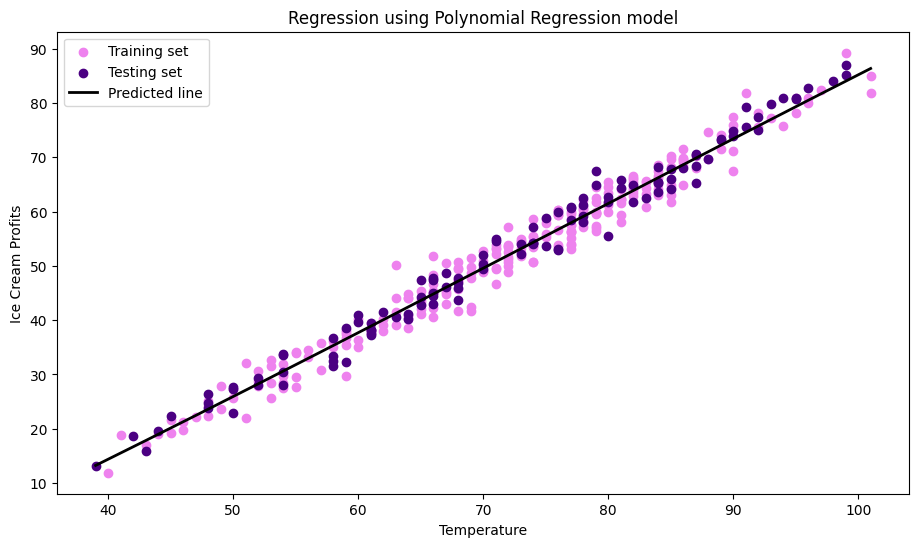

In [ ]:
# Plotting the plot for the new curve
plt.figure(figsize=(11,6))
plt.scatter(
    X_train, 
    y_train,
    color = 'violet',
    label = 'Training set'
)
plt.scatter(
    X_test, 
    y_test,
    color = 'indigo',
    label = 'Testing set'
)
plt.plot(X,
        y_pred_poly_whole, 
        color = 'black',
        linewidth = 2,
        label = 'Predicted line'
        )
plt.xlabel('Temperature')
plt.ylabel('Ice Cream Profits')
plt.title('Regression using Polynomial Regression model')
plt.legend()
plt.show()

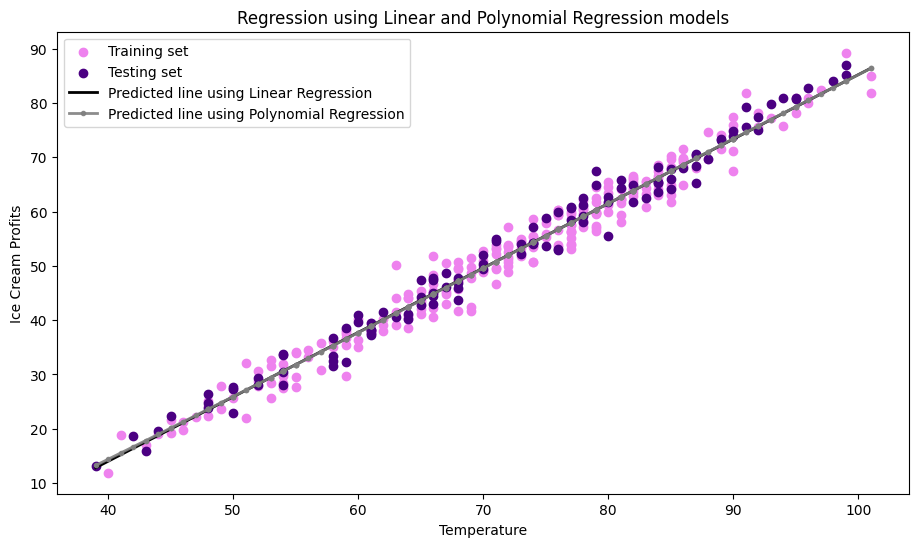

In [ ]:
# Comparing both models
plt.figure(figsize=(11,6))
plt.scatter(
    X_train, 
    y_train,
    color = 'violet',
    label = 'Training set'
)
plt.scatter(
    X_test, 
    y_test,
    color = 'indigo',
    label = 'Testing set'
)
plt.plot(X,
        lr.predict(X), 
        color = 'black',
        linewidth = 2,
        label = 'Predicted line using Linear Regression'
        )
plt.plot(X,
        y_pred_poly_whole, 
        color = 'grey',
        marker = '.',
        alpha = 0.9,
        linewidth = 2,
        label = 'Predicted line using Polynomial Regression'
        )
plt.xlabel('Temperature')
plt.ylabel('Ice Cream Profits')
plt.title('Regression using Linear and Polynomial Regression models')
plt.legend()
plt.show()

In [ ]:
# Evaluation : The model performance is almost same and we can say Linear Regression model can be used easily.
# Now we will finally try another model to check if result further improve

In [119]:
# Trying Descision tree classifier model
from sklearn.tree import DecisionTreeRegressor

In [126]:
pipe2 = Pipeline([
    ( 'clf' , DecisionTreeRegressor(
        criterion = 'squared_error',
        max_depth = 5
    ))
])

In [127]:
pipe2.fit(X_train,y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('clf', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"criterion criterion: {""squared_error"", ""friedman_mse"", ""absolute_error"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in the half mean Poisson deviance to find splits... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 0.24 Poisson deviance criterion.",'squared_error'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.For an example of how ``max_depth`` influences the model, see:ref:`sphx_glr_auto_examples_tree_plot_tree_regression.py`.",5
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `

In [137]:
clf = pipe2.named_steps['clf']

In [138]:
y_pred_clf = pipe2.predict(X_test)

In [140]:
rkf3 = RepeatedKFold(
    n_splits = 10,
    n_repeats = 5,
    random_state = 3
)

cvs_clf = cross_val_score(
    clf,
    X,
    y,
    cv = rkf3
)

In [141]:
# Lets analyze some metrics for this :
print(f'The mean of the cvs_clf : {cvs_clf.mean()}')
print(f'The std of the cvs_clf : {cvs_clf.std()}')
print(f'The r2score for the clf model : {r2_score(y_pred_clf,y_test)}')
print(f'The rmse for the clf model : {root_mean_squared_error(y_pred_clf,y_test)}')
print(f'The mae for the clf model : {mean_absolute_error(y_pred_clf,y_test)}')

The mean of the cvs_clf : 0.9687706588204625
The std of the cvs_clf : 0.009011994239023366
The r2score for the clf model : 0.9793233122733269
The rmse for the clf model : 2.5093415323376824
The mae for the clf model : 2.0104157156568907


In [ ]:
y_pred_clf_whole = pipe2.predict(X)

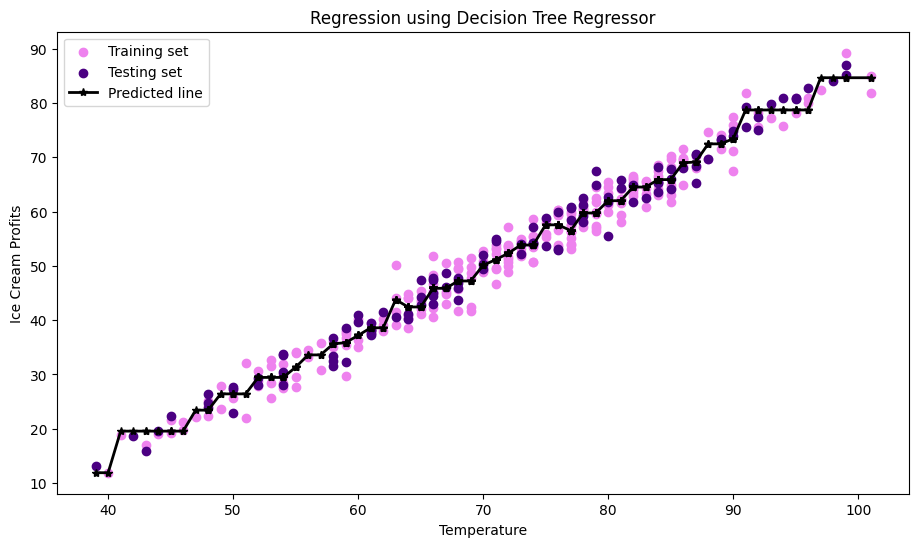

In [149]:
plt.figure(figsize=(11,6))
plt.scatter(
    X_train, 
    y_train,
    color = 'violet',
    label = 'Training set'
)
plt.scatter(
    X_test, 
    y_test,
    color = 'indigo',
    label = 'Testing set'
)
plt.plot(X,
        y_pred_clf_whole, # Predicting the whole X column as we want a whole line
        color = 'black',
        linewidth = 2,
        marker = '*',
        label = 'Predicted line'
        )
plt.xlabel('Temperature')
plt.ylabel('Ice Cream Profits')
plt.title('Regression using Decision Tree Regressor')
plt.legend()
plt.show()

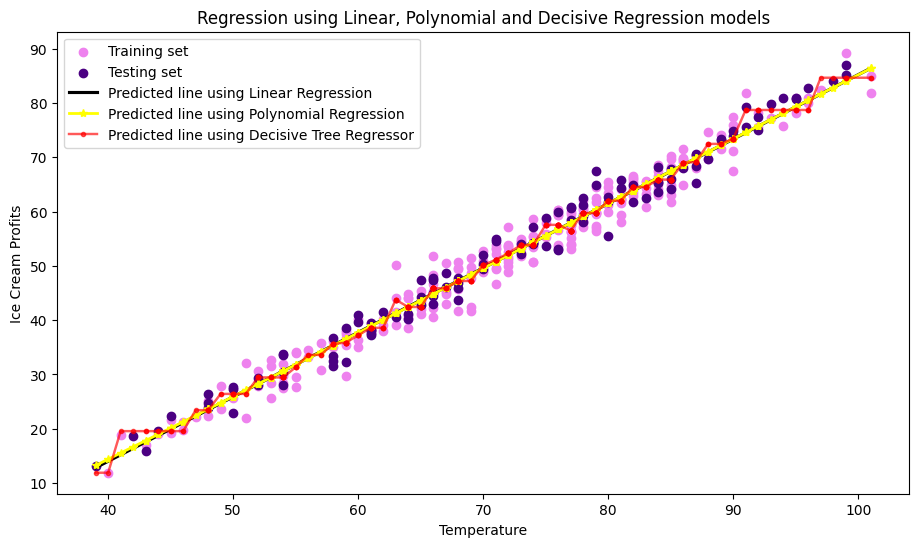

In [162]:
# Comparing both
plt.figure(figsize=(11,6))
plt.scatter(
    X_train, 
    y_train,
    color = 'violet',
    label = 'Training set'
)
plt.scatter(
    X_test, 
    y_test,
    color = 'indigo',
    label = 'Testing set'
)
plt.plot(X,
        lr.predict(X), 
        color = 'black',
        linewidth = 2.25,
        label = 'Predicted line using Linear Regression'
        )
plt.plot(X,
        y_pred_poly_whole, 
        color = 'yellow',
        marker = '*',
        alpha = 1,
        linewidth = 2,
        label = 'Predicted line using Polynomial Regression'
        )
plt.plot(X,
        y_pred_clf_whole, 
        color = 'red',
        marker = '.',
        alpha = 0.65,
        linewidth = 1.75,
        label = 'Predicted line using Decisive Tree Regressor'
        )
plt.xlabel('Temperature')
plt.ylabel('Ice Cream Profits')
plt.title('Regression using Linear, Polynomial and Decisive Regression models')
plt.legend()
plt.show()

In [ ]:
# Overall : Linear Regression is the best model for this dataset.